In [1]:
import os
import sys

import json

In [2]:
sys.path.append("..")

# Visualizing Benchmark Results

In [3]:
BENCH_ROOT = "../results/benchmarks"

In [4]:
bench_dir = os.path.join(
    BENCH_ROOT,
    "findview_sun360_alpha_indoor",
    "bounded_easy",
)
assert os.path.exists(bench_dir), f"{bench_dir} does not exist"

In [5]:
import seaborn as sns

In [6]:
fmri = sns.load_dataset("fmri")

In [7]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

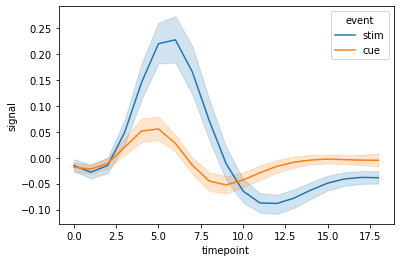

In [11]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

In [12]:
json_file = "run-sun360_alpha_indoor_basic_run_1_half-tag-reward.json"

In [16]:
with open(json_file, 'r') as f:
    data = json.load(f)

In [18]:
import pandas as pd

In [20]:
df = pd.DataFrame(data, columns=['time', 'step', 'reward'])

In [21]:
df

,time,step,reward
0,1.634010e+09,19456,0.216451
1,1.634011e+09,49152,0.224032
2,1.634011e+09,64512,0.228182
3,1.634011e+09,65536,0.228259
4,1.634011e+09,92160,0.228009
...,...,...,...
995,1.634391e+09,23499776,11.657782
996,1.634392e+09,23535616,12.790668
997,1.634392e+09,23541760,13.281368
998,1.634392e+09,23545856,12.943913


<AxesSubplot:xlabel='step', ylabel='reward'>

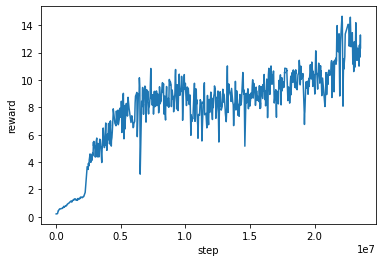

In [24]:
sns.lineplot(data=df, x="step", y="reward")

Try to add continuous error graph by adding min and max per each step, given average window

In [32]:
from collections import deque

In [55]:
que = deque(maxlen=15)
new_data = []

for i, d in enumerate(data):
    time = d[0]
    steps = d[1]
    reward = d[2]
    
    que.append(reward)
    
    avg_reward = sum(que) / len(que)
    min_reward = min(que)
    max_reward = max(que)
    
    new_data.append([steps, avg_reward])
    new_data.append([steps, min_reward])
    new_data.append([steps, max_reward]) 

In [56]:
new_df = pd.DataFrame(new_data, columns=['step', 'reward'])

<AxesSubplot:xlabel='step', ylabel='reward'>

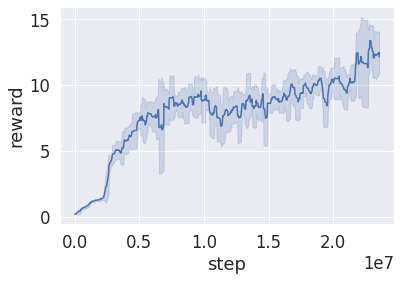

In [57]:
sns.set(style="darkgrid", font_scale=1.5)
sns.lineplot(data=new_df, x="step", y="reward", ci='sd')